<a href="https://colab.research.google.com/github/Sagarjain93/Healthcare/blob/main/Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name** - Exploratory Data Analysis of HealthCare Dataset

  **Project Type**    - EDA

  **Contribution**    - Individual
  
  **Team Member 1 -**  SAGAR JAIN


#**Project Summary**

#**Github Link**

https://github.com/Sagarjain93/Healthcare/tree/main

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **1. Know Your Data**

##**1.1. Import Libraries**

In [176]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.palettes.SEABORN_PALETTES.keys()

# Set a consistent theme for all plots
sns.set(style = 'whitegrid')

In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1.2. Load Dataset**

In [178]:
df = pd.read_csv('/content/drive/MyDrive/colab/eda/2. Healthcare/healthcare_dataset.csv')

## **1.3. Preview First Few Records**

Display the first 5 rows to get an initial idea of the dataset.

In [179]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


Display the last 5 rows to get an initial idea of the dataset.

In [180]:
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


##**1.4. Dataset Shape And Size**

###**1.4.1. Shape**

Check the number of rows and columns in the datase

In [181]:
df.shape

(55500, 15)

The dataset has 15 columns and 55500 rows

###**1.4.2. Size**

Total records in the dataset

In [182]:
df.size

832500

In total there are 8,32,500 values in the dataset .

##**1.5. Dataset Columns**

In [183]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

##**1.6. Dataset Summary**

###**1.6.1 Check Dataset Information**

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

✅ No missing values in any column — this is excellent.

🛠️ Date columns (Date of Admission, Discharge Date) are in object type and should be converted to datetime.

🧹 Columns like Name and Room Number may not be meaningful for analysis unless needed for specific use cases.

💊 Columns like Medical Condition, Medication, Test Results might need value count analysis, and if free text, some cleaning or grouping.


###**1.6.2. Statistical Summary Of Dataset**

Catgorizing all the columns into groups

In [185]:
# Categorical Columns (object or string type)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Numerical Columns (int or float type)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("🟢 Categorical Columns:\n", categorical_cols)
print("\n🔵 Numerical Columns:\n", numerical_cols)


🟢 Categorical Columns:
 ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']

🔵 Numerical Columns:
 ['Age', 'Billing Amount', 'Room Number']


####**A. Statistical Summary Of Numerical Columns**

In [186]:
df.describe().round()

,Age,Billing Amount,Room Number
count,55500.0,55500.0,55500.0
mean,52.0,25539.0,301.0
std,20.0,14211.0,115.0
min,13.0,-2008.0,101.0
25%,35.0,13241.0,202.0
50%,52.0,25538.0,302.0
75%,68.0,37821.0,401.0
max,89.0,52764.0,500.0


#####**Interpretation**

**🔶 Age**

The dataset represents a wide age range of patients (13 to 89 years), with a mean and median age of 52, indicating a balanced and symmetrical distribution. The majority of patients (middle 50%) fall between ages 35 and 68, suggesting that most admissions are from middle-aged to elderly individuals.


**💸 Billing Amount**

The mean and median billing amount is ₹25,539, indicating a generally consistent billing pattern across patients. **However, the presence of negative billing (-₹2,008) is a red flag, likely representing data entry errors or refunds, and should be cleaned before analysis.** The standard deviation of ₹14,211 reflects a wide variability in healthcare costs, possibly due to different treatments, facilities, or durations of stay.


**🏨 Room Number**

Rooms are numbered from 101 to 500, with an even distribution and average room number around 301. This hints at a well-utilized hospital facility, with rooms likely categorized in a structured manner (e.g., floors, departments). No abnormalities were detected in room assignment data.

####**B. Statistical Summary Of Categorical Columns**

In [187]:
df.describe(include='object')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27774,6969,9308,50,27,44,11249,18655,53,11140,18627


#####**Interpretation**

Patient Uniqueness: Nearly all names are unique, suggesting individual patient records. However, duplicates like "DAvId muNoZ" repeated 3 times with inconsistent capitalization might indicate data cleaning need.

Medical Trend: Conditions like Arthritis and medications like Lipitor suggest a trend in aging and cardiovascular/chronic health issues.

Operational Load: Certain doctors and hospitals have higher patient volumes, suggesting they are central hubs in the system.

Admission Planning: Majority of cases are elective, not emergency — implying advance booking, surgeries, or planned treatments.

Test Result Concern: High number of Abnormal test results implies a serious patient population. Critical for healthcare providers to look into disease trends or misdiagnosis rates.



##**1.7. Check For Duplicates**

In [188]:
#check duplicate values
df.duplicated().sum()

np.int64(534)

This shows that there are 534 duplicate values.

In [189]:
df[df.duplicated()]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55461,connOR coMPTon,63,Male,A+,Asthma,2021-08-21,Jonathan Allen,"and Willis Mullins, Bowers",Medicare,1936.702824,375,Emergency,2021-09-16,Paracetamol,Normal
55462,alYSsA mIlLER,35,Female,A-,Diabetes,2022-06-30,Ryan Price,Shelton-Gallagher,UnitedHealthcare,2210.460898,289,Elective,2022-07-27,Penicillin,Normal
55464,ChRIs huGHeS,35,Female,AB-,Obesity,2024-02-28,Katelyn Perry,Lyons-Hansen,Blue Cross,11889.154513,128,Emergency,2024-03-14,Paracetamol,Abnormal
55484,keNNEtH alvarez,80,Male,O+,Cancer,2022-05-05,Andrew Conner,Sons Mayo and,Cigna,45653.802310,114,Elective,2022-05-17,Aspirin,Normal


##**1.8. Check For Unique Values**

In [190]:
#check unique values in dataset
df.nunique()

,0
Name,49992
Age,77
Gender,2
Blood Type,8
Medical Condition,6
Date of Admission,1827
Doctor,40341
Hospital,39876
Insurance Provider,5
Billing Amount,50000


Various Types Of Unique Values (Column-wise) In The Dataset.

In [191]:
#unique values list column wise
for col in df.columns:
    print(f"\n🧾 Column: {col}")
    print(f"🔢 Unique Values Count: {df[col].nunique()}")
    print(f"📋 Unique Values: {df[col].unique()}")



🧾 Column: Name
🔢 Unique Values Count: 49992
📋 Unique Values: ['Bobby JacksOn' 'LesLie TErRy' 'DaNnY sMitH' ... 'LiSa sIMPsoN'
 'RoGER farRELl' 'kaTheRIne WeBSTer']

🧾 Column: Age
🔢 Unique Values Count: 77
📋 Unique Values: [30 62 76 28 43 36 21 20 82 58 72 38 75 68 44 46 63 34 67 48 59 73 51 23
 78 25 33 26 70 57 74 81 49 65 31 22 77 42 24 84 55 40 83 18 27 19 29 61
 80 60 35 79 53 69 47 85 52 37 50 32 54 45 66 39 56 64 71 41 88 17 87 86
 15 16 13 14 89]

🧾 Column: Gender
🔢 Unique Values Count: 2
📋 Unique Values: ['Male' 'Female']

🧾 Column: Blood Type
🔢 Unique Values Count: 8
📋 Unique Values: ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']

🧾 Column: Medical Condition
🔢 Unique Values Count: 6
📋 Unique Values: ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']

🧾 Column: Date of Admission
🔢 Unique Values Count: 1827
📋 Unique Values: ['2024-01-31' '2019-08-20' '2022-09-22' ... '2019-05-31' '2023-10-12'
 '2021-03-14']

🧾 Column: Doctor
🔢 Unique Values Count: 40341
📋 Unique V

👥 Patient Demographics
Name: 49,992 unique names out of 55,500 rows → indicates possible duplicate or repeat patients, especially with inconsistent casing (e.g., "TinA white" vs "Tina White").

Age: 77 unique ages (ranging from 13 to 89) → suggests a wide age range, which may impact medical conditions or billing.

Gender: Only 2 values ('Male', 'Female') → Data is binary-gender specific and clean, with no nulls or third categories.

🧬 Medical Details
Blood Type: 8 unique blood groups → complete standard set; can explore if certain blood types dominate in specific conditions.

Medical Condition: 6 conditions → manageable number, suitable for condition-wise analysis (e.g., cost by condition).

Medication: 5 medications → can easily group and analyze prescription trends.

Test Results: 3 categories → gives a quick way to segment patients by diagnostic results (Normal, Abnormal, Inconclusive).

🏥 Admission & Treatment Info
Date of Admission: 1,827 unique dates and

Discharge Date: 1,856 unique dates → rich time-series data available; good for trend analysis and calculating length of stay.

Admission Type: 3 types (Urgent, Emergency, Elective) → opens up scope for urgency-based care cost or outcome analysis.

Doctor: 40,341 unique names → very high; may indicate unstandardized entries, duplicates, or rotating doctors.

Hospital: 39,876 unique hospitals → similar concern as above; possibly noisy data or large hospital network.

💰 Billing and Logistics
Billing Amount: 50,000 unique values → very high granularity; can show detailed billing trends but may need binning.

Room Number: 400 unique values → might relate to ward-level cost analysis or patient placement trends.

🛡️ Insurance
Insurance Provider: Only 5 providers → compact enough for direct comparison in billing, approval rates, etc.

🎯 Key Early Takeaways
Dataset is rich in categorical and temporal diversity, perfect for trend, cost, and segmentation analysis.

Some columns like Name, Doctor, and Hospital might contain duplicates or unclean text entries due to inconsistent casing.

A small number of values in fields like Gender, Medication, Test Results, and Admission Type make them great for clear visualizations and summaries.



##**1.9. Check For Missing Values**

In [192]:
#Check missing values
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


##**1.10.Check For Outliers**

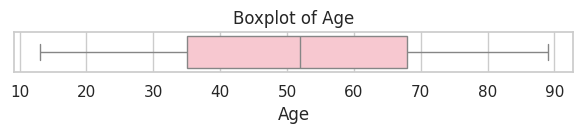

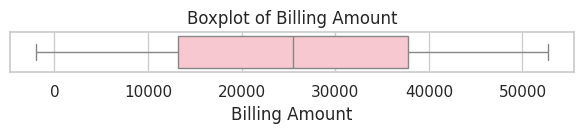

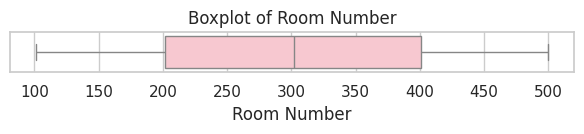

In [193]:
for col in numerical_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col],color = 'pink')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


**1. Age**

✅ Symmetrical distribution centered around 52 (matches .describe()).

❌ No visible outliers: All data points seem within whiskers.

🔍 Insight: Age data is clean and well-bounded (min 13, max 89). No further preprocessing needed for outliers.

**2. Billing Amount**

⚠️ Presence of outliers on the left (negative or very low values).

Confirmed by .describe() showing a minimum of -2008, which is not valid for billing.

🧹 Action required:

Filter or correct negative billing amounts – likely data entry issues.

**3. Room Number**

✅ Appears to be uniformly distributed between ~100 to 500.

❌ No outliers present.

🔍 Insight: Room numbers are within a logical range; outlier handling not needed here.

##**1.11. Check For "null" String**

In [212]:
(df == "null").sum()

,0
name,0
age,0
gender,0
blood_type,0
medical_condition,0
date_of_admission,0
doctor,0
hospital,0
insurance_provider,0
billing_amount,0


#**2. Data Cleaning/Preprocessing**

##**2.1 Column Name Standardization**

In [194]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

**All the columns should be in lower case and there should be "_"(underscore) instead of "  "(space).**

In [195]:
#lower case column name and replace space with underscore.
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [196]:
#check columns
df.columns

Index(['name', 'age', 'gender', 'blood_type', 'medical_condition',
       'date_of_admission', 'doctor', 'hospital', 'insurance_provider',
       'billing_amount', 'room_number', 'admission_type', 'discharge_date',
       'medication', 'test_results'],
      dtype='object')

##**2.2 Billing Amount Clean Up**

### 2.2.1. Rounded billing_amount to whole numbers

In [197]:
df.billing_amount.head()

,billing_amount
0,18856.281306
1,33643.327287
2,27955.096079
3,37909.782410
4,14238.317814


**To make the billing values cleaner and easier to work with, we round them to the nearest integer.**

In [198]:
#rounding the billing_amount values
df['billing_amount'] = df['billing_amount'].round(0).astype(int)

In [199]:
#check
df.billing_amount.head()

,billing_amount
0,18856
1,33643
2,27955
3,37910
4,14238


###2.2.2. Removed rows with negative billing_amount

In [206]:
# find and count values having negative value in billing_amount
df[df['billing_amount'] < 0]

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
132,ashLEy ERIcKSoN,32,Female,AB-,Cancer,2019-11-05,Gerald Hooper,"and Johnson Moore, Branch",Aetna,-503,376,Urgent,2019-11-23,Penicillin,Normal
799,CHRisTOPHer wEiss,49,Female,AB-,Asthma,2023-02-16,Kelly Thompson,Hunter-Hughes,Aetna,-1018,204,Elective,2023-03-09,Penicillin,Inconclusive
1018,AsHley WaRnER,60,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306,426,Elective,2022-01-11,Ibuprofen,Normal
1421,JAY galloWaY,74,Female,O+,Asthma,2021-01-20,Debra Everett,Group Peters,Blue Cross,-109,381,Emergency,2021-02-09,Ibuprofen,Abnormal
2103,josHUa wilLIamSon,72,Female,B-,Diabetes,2021-03-21,Wendy Ramos,"and Huff Reeves, Dennis",Blue Cross,-577,369,Urgent,2021-04-17,Aspirin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52213,mr. ChRIStOPhER aLvARaDO,74,Male,AB+,Obesity,2022-06-03,Mr. Dean Guzman DDS,Johnson Inc,Blue Cross,-1310,257,Elective,2022-06-13,Paracetamol,Inconclusive
52629,gABrieLlE deCkER,66,Male,AB-,Arthritis,2022-11-07,William Krause,Diaz-Bishop,Cigna,-677,354,Urgent,2022-11-30,Penicillin,Normal
53204,AsHley WaRnER,55,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306,426,Elective,2022-01-11,Ibuprofen,Normal
53232,dAnIel dRaKe,68,Female,B+,Hypertension,2020-04-24,Brett Ray,Carr Ltd,Aetna,-592,426,Elective,2020-04-26,Lipitor,Abnormal


There are 106 values with negative value

In [207]:
#removing the rows with Negative values
before = df.shape[0]
df = df[df['billing_amount'] >= 0]
after = df.shape[0]
print(f"Removed {before - after} rows with negative billing amounts.")


Removed 106 rows with negative billing amounts.


##**2.3. Date Column Cleanup**

In [200]:
#Check dtypes of "discharge_date" and "date_of_admission" columns
df[['discharge_date','date_of_admission']].dtypes

,0
discharge_date,object
date_of_admission,object


In [201]:
#converting the datatypes of the above 2 columns to datetime type.
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'], errors='coerce')
df['discharge_date'] = pd.to_datetime(df['discharge_date'], errors='coerce')

In [202]:
#check
df[['discharge_date','date_of_admission']].dtypes

,0
discharge_date,datetime64[ns]
date_of_admission,datetime64[ns]


##**2.4. Handling Duplicates**

In [203]:
#find duplicate values
df.duplicated().sum()

np.int64(534)

In [204]:
#drop duplicate values from the dataset
df = df.drop_duplicates()

In [205]:
#check
df.duplicated().sum()

np.int64(0)

##**2.5. Text Formatting**

In [208]:
# check case of name columns
df.name.head()

,name
0,Bobby JacksOn
1,LesLie TErRy
2,DaNnY sMitH
3,andrEw waTtS
4,adrIENNE bEll


There is alot of inconsitency in the values of the 'name' column.

In [209]:
#standardizing the case of values of the name columns
df['name'] = df['name'].str.title()

In [210]:
#check after standardizationi of the column value
df.name.head()

,name
0,Bobby Jackson
1,Leslie Terry
2,Danny Smith
3,Andrew Watts
4,Adrienne Bell


## **Summary Of Data Cleaning And Preprocessing**

1.Renamed all column names by replacing spaces with underscores for consistency.

2.Rounded the billing_amount column to the nearest integer for uniformity.

3.Removed rows with negative billing amounts to ensure data validity.

4.Converted admission_date and discharge_date columns to proper datetime format.

5.Standardized the casing in the name column using title case for readability.

6.Removed duplicate rows to avoid redundancy in data.

7.Checked and verified data types for all columns to ensure correctness.


